In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../data/Headway Data.csv')

In [3]:
weather_all = pd.read_csv('../data/bna_weather.csv')

### info for all csv files

In [4]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [5]:
weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9739 non-null   object 
 1   key                        9739 non-null   object 
 2   class                      9739 non-null   object 
 3   expire_time_gmt            9739 non-null   int64  
 4   obs_id                     9739 non-null   object 
 5   obs_name                   9739 non-null   object 
 6   valid_time_gmt             9739 non-null   int64  
 7   day_ind                    9739 non-null   object 
 8   temp                       9739 non-null   int64  
 9   wx_icon                    9739 non-null   int64  
 10  icon_extd                  9739 non-null   int64  
 11  wx_phrase                  9739 non-null   object 
 12  pressure_tend              2885 non-null   float64
 13  pressure_desc              2885 non-null   objec

### n/a counts

In [6]:
headway.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

In [7]:
weather_all.isna().sum()

Date                            0
key                             0
class                           0
expire_time_gmt                 0
obs_id                          0
obs_name                        0
valid_time_gmt                  0
day_ind                         0
temp                            0
wx_icon                         0
icon_extd                       0
wx_phrase                       0
pressure_tend                6854
pressure_desc                6854
dewPt                           0
heat_index                      0
rh                              0
pressure                        0
vis                             4
wc                              8
wdir                         1522
wdir_cardinal                   8
gust                         8279
wspd                            8
max_temp                     9378
min_temp                     9378
precip_total                 9636
precip_hrly                     0
snow_hrly                    9730
uv_desc       

### narrowing weather data down to date and temperature

In [8]:
weather_all[['Date', 'temp', 'wx_phrase']]

,Date,temp,wx_phrase
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair
...,...,...,...
9734,2022-10-31 19:53:00,60,Cloudy
9735,2022-10-31 20:53:00,60,Cloudy
9736,2022-10-31 21:53:00,58,Mostly Cloudy
9737,2022-10-31 22:53:00,60,Mostly Cloudy


In [9]:
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [10]:
headway['HDWY_DEV'].describe()

count    1.507347e+06
mean     3.647395e-01
std      6.579797e+00
min     -2.220667e+02
25%     -1.883334e+00
50%      0.000000e+00
75%      1.966666e+00
max      1.054617e+03
Name: HDWY_DEV, dtype: float64

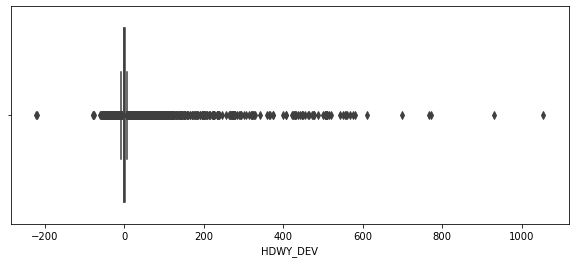

In [11]:
plt.figure(figsize = (10,4))

sns.boxplot(data = headway,
            x = 'HDWY_DEV');

### Dropped all columns to right of HDWY_DEV 

In [12]:
headway.drop(headway.iloc[:, 22:30], inplace=True, axis=1)

In [21]:
headway_df = headway.rename(columns={"DATE":"Date"})

In [22]:
headway_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,Date,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [14]:
headway.ROUTE_ABBR.unique()

array([ 7, 50, 22, 23,  3, 52, 55, 56])

In [15]:
weather_all['Date'] = weather_all['Date'].str[:10]
weather_all

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,2022-10-31,KBNA,observation,1667271180,KBNA,Nashville,1667263980,N,60,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9735,2022-10-31,KBNA,observation,1667274780,KBNA,Nashville,1667267580,N,60,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,2022-10-31,KBNA,observation,1667278380,KBNA,Nashville,1667271180,N,58,27,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9737,2022-10-31,KBNA,observation,1667281980,KBNA,Nashville,1667274780,N,60,27,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
weather_all[['Date', 'temp', 'wx_phrase']]

,Date,temp,wx_phrase
0,2021-11-01,51,Cloudy
1,2021-11-01,50,Partly Cloudy
2,2021-11-01,49,Fair
3,2021-11-01,48,Fair
4,2021-11-01,47,Fair
...,...,...,...
9734,2022-10-31,60,Cloudy
9735,2022-10-31,60,Cloudy
9736,2022-10-31,58,Mostly Cloudy
9737,2022-10-31,60,Mostly Cloudy


In [24]:
wego_trips = headway_df.merge(weather_all, on=['Date'], how='outer')
wego_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,Date,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52592381,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52592382,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52592383,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52592384,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CALENDAR_ID            int64  
 1   SERVICE_ABBR           int64  
 2   ADHERENCE_ID           int64  
 3   DATE                   object 
 4   ROUTE_ABBR             int64  
 5   BLOCK_ABBR             int64  
 6   OPERATOR               int64  
 7   TRIP_ID                int64  
 8   OVERLOAD_ID            int64  
 9   ROUTE_DIRECTION_NAME   object 
 10  TIME_POINT_ABBR        object 
 11  ROUTE_STOP_SEQUENCE    float64
 12  TRIP_EDGE              int64  
 13  LATITUDE               float64
 14  LONGITUDE              float64
 15  SCHEDULED_TIME         object 
 16  ACTUAL_ARRIVAL_TIME    object 
 17  ACTUAL_DEPARTURE_TIME  object 
 18  ADHERENCE              float64
 19  SCHEDULED_HDWY         float64
 20  ACTUAL_HDWY            float64
 21  HDWY_DEV               float64
dtypes: float64(7), int